##### Copyright 2018 The TensorFlow Authors.

In [10]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [11]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [85]:

datagen = ImageDataGenerator(
#         rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


def getData(src=None):
    datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
    data = datagen.flow_from_directory(src,target_size=(128, 128), color_mode="rgb",class_mode='binary', batch_size=9348)
    return data

class_names = ['Grenade', 'Knives', 'Machine Guns', 'Masked Face', 'Pistol Hand Guns', 'RPG']

train_images_batches = getData("images/Weapons/train")
test_images_batches = getData("images/Weapons/test")




train_images, train_labels = next(train_images_batches)
test_images, test_labels = next(test_images_batches)

Found 9348 images belonging to 6 classes.
Found 150 images belonging to 6 classes.
Found 0 images belonging to 1 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [86]:
len(train_labels)

3000

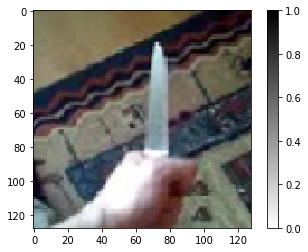

In [87]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

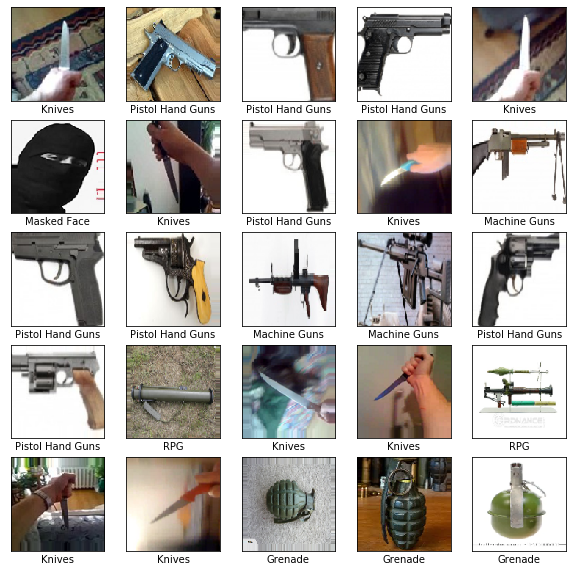

In [89]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()

In [90]:
model = keras.Sequential([
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None),
    keras.layers.Flatten(input_shape=(64, 64,3)),
#     keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [91]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [105]:
model.fit(train_images, train_labels, epochs=40)

Train on 3000 samples
Epoch 1/40
3000/3000 [==============================] - 3s 915us/sample - loss: 0.3803 - accuracy: 0.8663
Epoch 2/40
3000/3000 [==============================] - 3s 893us/sample - loss: 0.4254 - accuracy: 0.8477
Epoch 3/40
3000/3000 [==============================] - 2s 652us/sample - loss: 0.4113 - accuracy: 0.8580
Epoch 4/40
3000/3000 [==============================] - 3s 950us/sample - loss: 0.4685 - accuracy: 0.8363
Epoch 5/40
3000/3000 [==============================] - 2s 624us/sample - loss: 0.4607 - accuracy: 0.8367
Epoch 6/40
3000/3000 [==============================] - 2s 653us/sample - loss: 0.4006 - accuracy: 0.8590
Epoch 7/40
3000/3000 [==============================] - 2s 668us/sample - loss: 0.3793 - accuracy: 0.8673
Epoch 8/40
3000/3000 [==============================] - 2s 663us/sample - loss: 0.3704 - accuracy: 0.8693
Epoch 9/40
3000/3000 [==============================] - 2s 683us/sample - loss: 0.4100 - accuracy: 0.8567
Epoch 10/40
3000/3000 [=

In [106]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

150/1 - 0s - loss: 1.4766 - accuracy: 0.7067

Test accuracy: 0.70666665


In [107]:
print(test_images.shape)
predictions = model.predict(test_images)

(150, 128, 128, 3)


In [108]:
predictions[0]

array([7.1143193e-05, 9.7976148e-01, 3.4353778e-09, 4.5166735e-06,
       3.1152032e-07, 2.0162536e-02, 8.7737073e-26, 0.0000000e+00,
       7.6477759e-34, 4.3293442e-16], dtype=float32)

In [109]:
np.argmax(predictions[0])

1

In [110]:
test_labels[0]

5.0

In [111]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[int(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[int(true_label)].set_color('blue')

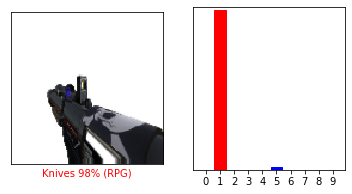

In [112]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

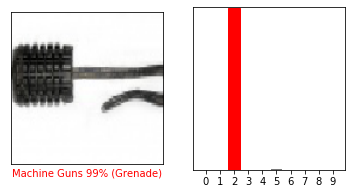

In [113]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

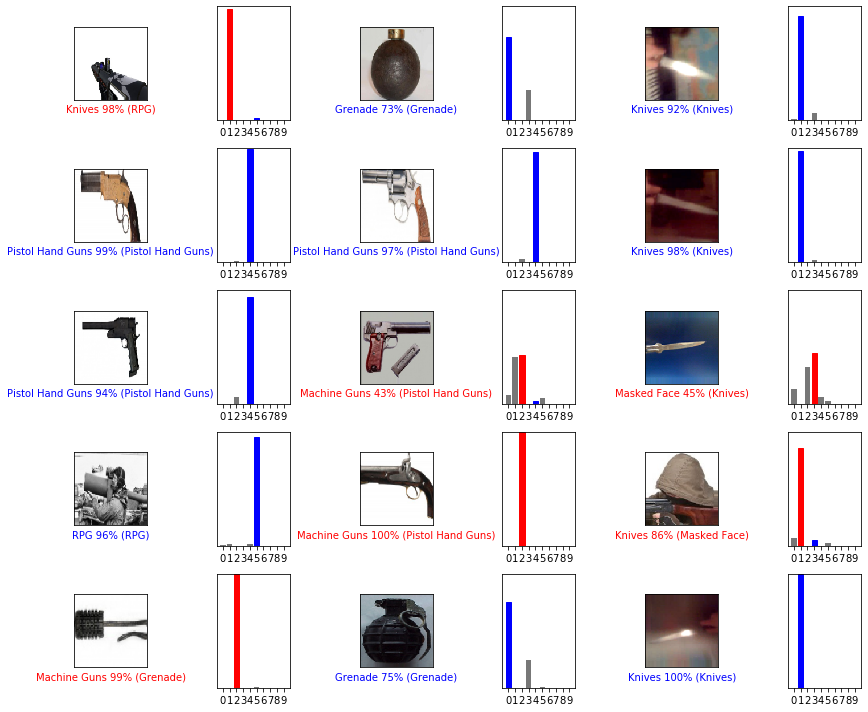

In [114]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

female-shooter.jpg
85.69866418838501
RPG


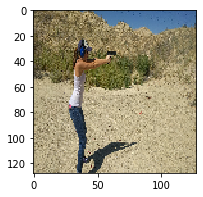

0*nqJF8OxkneBIbAJn.jpeg
95.25483250617981
Pistol Hand Guns


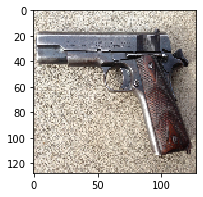

images-4.jpeg
74.88397359848022
Knives


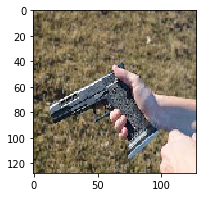

550px-TWD_Ford.jpg
52.03995704650879
Knives


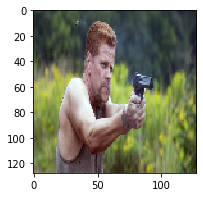

images-2.jpeg
99.9904990196228
Knives


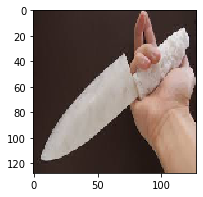

armas (50).jpg
93.28333139419556
Masked Face


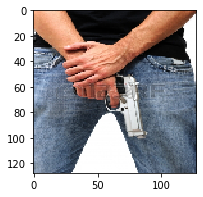

skynews-knife-stabbing-london_4570634.jpg
93.76050233840942
Knives


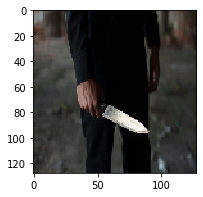

images-3.jpeg
70.1643168926239
RPG


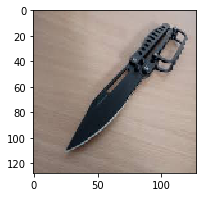

19404678-7546963-image-m-21_1570465306884.jpg
49.04492795467377
Machine Guns


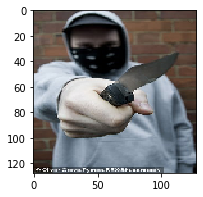

armas (28).jpg
42.71998703479767
Grenade


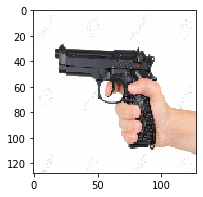

6_Young-Adult-holding-Knifeed.jpg
87.92674541473389
Knives


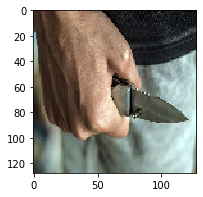

armas (43).jpg
99.31642413139343
Masked Face


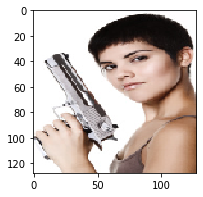

1597100.jpg
46.60133719444275
Knives


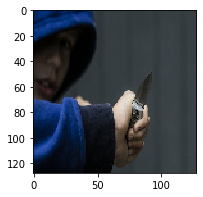

IsADirectoryError: [Errno 21] Is a directory: 'images/Weapons/validation/.ipynb_checkpoints'

In [119]:
from os import listdir
for filename in listdir('images/Weapons/validation/'):
    image = tf.keras.preprocessing.image.load_img(
    'images/Weapons/validation/' + filename,
    grayscale=False,
    color_mode='rgb',
    target_size=(128,128))
    normalizedData = tf.keras.preprocessing.image.img_to_array(image) / 255.0
    predictions_value_array = model.predict(np.array([normalizedData]))
    print(filename)
    print(np.max(predictions_value_array) * 100)
    print(class_names[np.argmax(predictions_value_array)])
    plt.figure(figsize=(6,3))
    plt.imshow(image, cmap=plt.cm.binary)
    plt.show()



